# Projet final du Kit Data Science 2020 - Louis ROSE

                                   



## Acquisition et chargement des données: 3 points

On importe notamment la librairie requests  et le module BeautifulSoup, qui serviront à récupérer les données que l'on cherche sur le site du Vendée Globe.

In [116]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

### Récupération des fichiers Excel avec les classements.

In [2]:
url_classement = 'https://www.vendeeglobe.org/fr/classement'
content = requests.get(url_classement)
soup = BeautifulSoup(content.text)
soup

<!DOCTYPE html>
<html lang="fr">
<head>
<meta charset="utf-8"/>
<title>Classement - Vendée Globe</title>
<meta content="Consultez le classement officiel du Vendée Globe 2020, la seule course à la voile autour du monde, en solitaire, sans escale et sans assistance. Classements publiés à 05h, 09h, 12h, 15h, 18h, 22h (FR)" name="description"/>
<meta content="" name="keywords"/>
<meta content="max-snippet:-1" name="robots"/>
<meta content="origin" name="referrer"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- SOCIAL METAS TAGS -->
<meta content="Classement - Vendée Globe" property="og:title"/>
<meta content="Consultez le classement officiel du Vendée Globe 2020, la seule course à la voile autour du monde, en solitaire, sans escale et sans assistance. Classements publiés à 05h, 09h, 12h, 15h, 18h, 22h (FR)" property="og:description"/>
<meta content="website" property="og:type"/>
<meta content="https://www.vendeeglobe.org/fr/classement" property="og:url"/>
<me

La variable soup contient le code html de la page Classmeent du site du Vendée Globe.

Ci-dessous, la fonction last_ranking nous permet d'accéder au dernier classement à avoir été uploadé sur le site du Vendée Globe.

In [3]:
def last_ranking():
    '''
    Cette fonction ne prend pas d'argument, et renvoie sous forme de Dataframe le dernier 
    classement à avoir été uploadé sur le site du Vendée Globe (sous format .xlsx).
    '''
    url_classement = 'https://www.vendeeglobe.org/fr/classement'
    content = requests.get(url_classement)
    soup = BeautifulSoup(content.text)
    attributes = soup.find('a',{"class" : "rankings__download"}).attrs
    print("Attributes :" + str(attributes))
    url_rankings = "https://vendeeglobe.org" + attributes['href']
    rankings_df = pd.read_excel(url_rankings)
    return(rankings_df)

In [4]:
last_ranking()

Attributes :{'class': ['rankings__download'], 'href': '/download-race-data/vendeeglobe_20201130_170000.xlsx', 'download': ''}


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Classement du lundi 30 novembre 2020 à 18h00 FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,NaN,NaN,NaN,Depuis 30 minutes\nSince 30 minutes,NaN,NaN,...,Depuis le dernier classement\nSince the the la...,NaN,NaN,NaN,Depuis 24 heures\nSince 24 hours,NaN,NaN,NaN,DTF,DTL
3,NaN,NaN,NaN,NaN,Heure FR\nHour FR,Latitude\nLatitude,Longitude\nLongitude,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,...,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,NaN,NaN
4,NaN,1,\nFRA 79,Charlie Dalin\nAPIVIA,17:30 FR\n,40°38.93'S,16°27.67'E,124°,15.0 kts,14.2 kts,...,128°,17.4 kts,16.2 kts,52.3 nm,113°,15.5 kts,15.5 kts,372.1 nm,17647.1 nm,0.0 nm
5,NaN,2,\nFRA 59,Thomas Ruyant\nLinkedOut,17:30 FR\n,41°02.62'S,10°48.69'E,104°,17.2 kts,17.2 kts,...,104°,15.9 kts,15.9 kts,47.8 nm,106°,17.1 kts,17.0 kts,401.4 nm,17888.8 nm,241.8 nm
6,NaN,3,\nFRA 85,Kevin Escoffier\nPRB,15:00 FR\n-150min,40°56.67'S,09°16.33'E,115°,9.7 kts,9.6 kts,...,115°,9.7 kts,9.6 kts,4.8 nm,102°,18.0 kts,17.8 kts,432.6 nm,17957.7 nm,310.6 nm
7,NaN,4,\nFRA 01,Jean Le Cam\nYes we Cam !,17:30 FR\n,40°54.74'S,09°15.80'E,177°,5.4 kts,1.8 kts,...,114°,10.3 kts,10.2 kts,31.0 nm,108°,16.0 kts,16.0 kts,384.3 nm,17958.6 nm,311.5 nm
8,NaN,5,\nFRA 18,Louis Burton\nBureau Vallée 2,17:30 FR\n,44°07.28'S,08°16.47'E,90°,15.8 kts,15.6 kts,...,94°,19.5 kts,19.4 kts,58.6 nm,105°,18.6 kts,18.6 kts,446.1 nm,17958.6 nm,311.6 nm
9,NaN,6,\nFRA 17,Yannick Bestaven\nMaître Coq IV,17:30 FR\n,41°29.46'S,08°54.31'E,116°,20.8 kts,20.4 kts,...,118°,18.7 kts,18.3 kts,56.2 nm,113°,17.7 kts,17.7 kts,425.4 nm,17965.0 nm,318.0 nm


On remarque que le Dataframe renvoyé par last_ranking contient beaucoup 
de valeurs "null". Nous nettoierons ce dataframe dans la partie suivante.

On définit maintenant la fonction ranking_number_n, qui peut nous renvoyer n'importe quel classement qui à déjà été uploadé sur le site du Vendée Globe (6 classements sont uploadés chaque jour). 

(n = 1) correspond au tout premier classement établi (au départ de la course)

(n = 2) correspond au classement établi 2 heures après,
etc...

In [5]:
def ranking_number_n(n):
    '''
    Cette fonction prend un entier n >= 1 en argument, et renvoie sous forme de 
    Dataframe le n-ème classement à avoir été uploadé sur le site du Vendée Globe.
    '''
    url_classement = 'https://www.vendeeglobe.org/fr/classement'
    content = requests.get(url_classement)
    soup = BeautifulSoup(content.text)
    list_of_datetimes = []
    for option in soup.find_all('option'):
        list_of_datetimes.append(option.attrs['value'])
    list_of_datetimes= list_of_datetimes[1:]
    #print("Datetime : " + str(list_of_datetimes[-n]))
    url_rankings = "https://vendeeglobe.org" + "/download-race-data/vendeeglobe_" + str(list_of_datetimes[-n]) +".xlsx"
    rankings_df = pd.read_excel(url_rankings)
    return(rankings_df)
    
ranking_number_n(1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Classement du dimanche 08 novembre 2020 à 14h0...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Rang\nRank,Nat. / Voile\nNat. / Sail,Skipper / Bateau\nSkipper / crew,NaN,NaN,NaN,Depuis 30 minutes\nSince 30 minutes,NaN,NaN,...,Depuis le dernier classement\nSince the the la...,NaN,NaN,NaN,Depuis 24 heures\nSince 24 hours,NaN,NaN,NaN,DTF,DTL
3,NaN,NaN,NaN,NaN,Heure FR\nHour FR,Latitude\nLatitude,Longitude\nLongitude,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,...,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,Cap\nHeading,Vitesse\nSpeed,VMG\nVMG,Distance\nDistance,NaN,NaN
4,NaN,NaN,\nFRA 79,Charlie Dalin\nAPIVIA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,\nFRA 4,Sébastien Simon\nARKEA PAPREC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,\nFRA 30,Clarisse Cremer\nBanque Populaire X,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,\nFRA 18,Louis Burton\nBureau Vallée 2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,\nFRA 50,Miranda Merron\nCampagne de France,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,\nFRA 8,Jérémie Beyou\nCharal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On peut remarquer une erreur dans les Dataframes récupérés : ranking_number_n(1) renvoie bien les données relatives au départ de la course (Toutes les valeurs de vitesse, distance etc.. sont "null"), mais on trouve en haut à gauche du Dataframe "classement au 8 novembre à 14 heures", soit deux heures après le départ de la course.

Ce décalage est présent dans tous les Dataframes récupérés, il faudra donc y porter attention.

Ci-dessous on définit la fonction number_of_available_rankings, qui nous sera utile plus tard pour itérer sur l'ensemble des classements uploadés.

Bien évidemment, l'entier renvoyé par cette fonction augmente chaque jour, tant que la course n'est pas terminée.

In [6]:
def number_of_available_rankings():
    '''
    Cette fonction ne prend pas d'argument, et renvoie le nombre total de classements
    uploadés sur le site du Vendée Globe depuis le début de la course.
    '''
    url_classement = 'https://www.vendeeglobe.org/fr/classement'
    content = requests.get(url_classement)
    soup = BeautifulSoup(content.text)
    list_of_datetimes = []
    for option in soup.find_all('option'):
        list_of_datetimes.append(option.attrs['value'])
    return(len(list_of_datetimes))

number_of_available_rankings()

137

### Extraction des fiches techniques pour chacun des voiliers.

On va maintenant récuperer les données techniques sur l'ensemble des voiliers. 
On fera en sorte d'avoir n seul Dataframe pour contenir l'ensemble de ces données.

L'url https://www.vendeeglobe.org/fr/glossaire ne contient pas directement les données techniques sur les différents voiliers. Mais c'est via cet url qu'on peut trouver les urls que l'on cherche effectivement : ces derniers sont de la forme
https://www.vendeeglobe.org/fr/skippers/numero/name'

La seconde moitié de cet url, qui est nominative, se trouve dans le code source de l'url https://www.vendeeglobe.org/fr/glossaire.

In [7]:
def list_of_skippers_url():
    '''
    Cette fonction ne prend pas d'arguments, et renvoie la liste des urls où l'on trouvera les données techniques 
    sur les voiliers. Il y a un url par skipper.
    '''
    url_voiliers = 'https://www.vendeeglobe.org/fr/glossaire'
    content = requests.get(url_voiliers)
    soup_voiliers = BeautifulSoup(content.text)
    l = soup_voiliers.find_all("a",{'class':"menu-skippers__item"})
    urls_skippers_list = []
    for skipper in l:
        end_of_url_skipper = skipper.attrs['href']
        url_skipper = 'https://www.vendeeglobe.org' + end_of_url_skipper
        urls_skippers_list.append(url_skipper)
    return(urls_skippers_list)

list_of_skippers_url()

['https://www.vendeeglobe.org/fr/skippers/93/fabrice-amedeo',
 'https://www.vendeeglobe.org/fr/skippers/110/romain-attanasio',
 'https://www.vendeeglobe.org/fr/skippers/100/alexia-barrier',
 'https://www.vendeeglobe.org/fr/skippers/91/yannick-bestaven',
 'https://www.vendeeglobe.org/fr/skippers/103/jeremie-beyou',
 'https://www.vendeeglobe.org/fr/skippers/88/arnaud-boissieres',
 'https://www.vendeeglobe.org/fr/skippers/106/louis-burton',
 'https://www.vendeeglobe.org/fr/skippers/123/didac-costa',
 'https://www.vendeeglobe.org/fr/skippers/92/manuel-cousin',
 'https://www.vendeeglobe.org/fr/skippers/95/clarisse-cremer',
 'https://www.vendeeglobe.org/fr/skippers/105/charlie-dalin',
 'https://www.vendeeglobe.org/fr/skippers/97/sam-davies',
 'https://www.vendeeglobe.org/fr/skippers/117/sebastien-destremau',
 'https://www.vendeeglobe.org/fr/skippers/112/benjamin-dutreux',
 'https://www.vendeeglobe.org/fr/skippers/89/kevin-escoffier',
 'https://www.vendeeglobe.org/fr/skippers/114/clement-gira

In [8]:
def from_url_to_boat_specs(i):
    '''
    Cette fonction prend en argument un entier i, et renvoie un Dataframe contenant les specs du voilier/skipper
    numéroté i dans la liste renvoyée par la fonction list_of_skippers_url.
    '''
    url_skipper = list_of_skippers_url()[i]
    
    skipper_name_list = url_skipper.split("/")[-1].split('-')
    skipper_name = ""
    for elt in skipper_name_list:
        skipper_name += (str(elt) + " ")
    skipper_name = skipper_name.title() 
    content_skipper = requests.get(url_skipper)
    soup_skipper = BeautifulSoup(content_skipper.text, 'html.parser')
    skipper_specs = soup_skipper.find_all("li",{"class" : "skipper-boat-list-specs-list__item"})
    l = [[],[]]
    for item in skipper_specs:
        l[0].append(item.text.split(":")[0])
        l[1].append(item.text.split(":")[1])
        df = pd.DataFrame(l)
        df[len(df.columns)] = ("Nom du Skipper", skipper_name)
    return(df.T.set_index(0).T)

In [9]:
from_url_to_boat_specs(0)

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Nom du Skipper
1,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,01 Août 2015,"18,28 m","5,85 m","4,50 m",7 t,foils,29 m,monotype,320 m2,570 m2,Fabrice Amedeo


On va maintenant définir une dernière fonction, from_urls_to_boat_specs, qui va concaténer tous les Dataframes renvoyés par from_url_to_boat_specs, pour toutes les valeurs de i admissibles.

In [10]:
def from_urls_to_all_specs(urls_skippers_list):
    '''
    Cette fonction prend en argument la liste des urls de skippers, et renvoie un
    Dataframe avec l'ensemble des données, où 1 ligne correspond à 1 voilier.
    '''
    l = []
    i = 0
    for url in urls_skippers_list:
        l.append(from_url_to_boat_specs(i))
        i += 1
    df = pd.concat(l)
    df = df.set_index("Nom du Skipper")
    return(df)

from_urls_to_all_specs(list_of_skippers_url())

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
Nom du Skipper,,,,,,,,,,,,,,
Fabrice Amedeo,FRA 56,"No Way Back, Vento di Sardegna",VPLP/Verdier,Persico Marine,01 Août 2015,"18,28 m","5,85 m","4,50 m",7 t,foils,29 m,monotype,320 m2,570 m2
Romain Attanasio,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),08 Mars 2007,"18,28m","5,80m","4,50m",9t,2,28m,acier forgé,280 m2,560 m2
Alexia Barrier,FRA72,"Famille Mary-Etamine du Lys, Initiatives Coeu...",Marc Lombard,MAG France,01 Mars 1998,"18,28m","5,54m","4,50m",9t,2,29 m,acier,260 m2,580 m2
Yannick Bestaven,17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,12 Mars 2015,"18,28 m","5,80 m","4,50 m",8 t,foils,29 m,acier mécano soudé,310 m2,550 m2
Jeremie Beyou,08,NaN,VPLP,CDK Technologies,18 Août 2018,"18,28 m","5,85 m","4,50 m",8t,foils,29 m,acier,320 m2,600 m2
Arnaud Boissieres,FRA 14,"Ecover3, Président, Gamesa, Kilcullen Voyager...",Owen Clarke Design LLP - Clay Oliver,Hakes Marine - Mer Agitée,03 Août 2007,"18,28 m","5,65 m","4,50 m","7,9 tonnes",foils,29 m,basculante avec vérin,300 m²,610 m²
Louis Burton,18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,09 Juin 2015,"18,28 m","5,80 m","4,50 m","7,6 t",foils,28 m,acier,300 m2,600 m2
Didac Costa,ESP 33,Kingfisher - Educacion sin Fronteras - Forum ...,Owen Clarke Design,Martens Yachts,02 Février 2000,"18,28 m","5,30 m","4,50 m","8,9 t",2,26 m,acier,240 m2,470 m2
Manuel Cousin,FRA 71,"Paprec-Virbac2, Estrella Damm, We are Water, ...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),02 Février 2007,"18,28 m","5,80 m","4,50 m",9 t,2 asymétriques,"28,50",basculante sur vérin hydraulique,270 m2,560 m2


### DONNEES :

Par souci pratique, on recopie içi le nom des trois fonctions qui nous permettront de récupérer l'ensemble des données pertinentes.

In [11]:
#last_ranking()

#ranking_number_n()

#from_urls_to_all_specs(list_of_skippers_url())

## Préparation des données : 5 points

### Fiches techniques des voiliers

On initilaise la variable df_specs, qui contient le résultat renvoyé par la fonction from_urls_to_all_specs(list_of_skippers_url()), c'est à dire le Dataframe contenant les données techniques sur l'ensemble des voiliers.

Le passage par une variable "specs", que l'on copie, nous permettra si besoin de récupérer le DataFrame "original" (non cleané) sans devoir refaire tourner la fonction.

In [12]:
specs = from_urls_to_all_specs(list_of_skippers_url())

In [13]:
df_specs = specs.copy()
df_specs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Fabrice Amedeo  to Nicolas Troussel 
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Numéro de voile                32 non-null     object
 1   Anciens noms du bateau         24 non-null     object
 2   Architecte                     33 non-null     object
 3   Chantier                       33 non-null     object
 4   Date de lancement              33 non-null     object
 5   Longueur                       33 non-null     object
 6   Largeur                        33 non-null     object
 7   Tirant d'eau                   33 non-null     object
 8   Déplacement (poids)            33 non-null     object
 9   Nombre de dérives              33 non-null     object
 10  Hauteur mât                    33 non-null     object
 11  Voile quille                   32 non-null     object
 12  Surface de voiles au près      33 non-null

    On observe que les colonnes "Numéro de Voile", "Anciens noms du bateau", et "voile quille" comprennent des valeurs null. 
    
    Ci-dessous, nous définissons des fonctions simples, qui seront incorporées dans la grande fonction de clean.

In [14]:
def name_cleaning(all_names):
    '''
    Cette fonction permet de s'assurer qu'un seul espace sépare les différents mots dans un string.
    '''
    all_names = all_names.split(",")
    cleaned_name = ""
    for name in all_names :
        name = name.strip()
        cleaned_name += name + ", "
    cleaned_name = cleaned_name[:-2]
    return(cleaned_name)


print("Test : " + str(name_cleaning("  Gitana Eighty,   Synerciel,    Newrest-Matmut")))

def simple_cleaning(name): 
    '''
    Cette fonction applique .strip() à la variable passée en entrée transformée en str.
    '''
    return(str(name).strip())

print("Test : " + str(simple_cleaning("  azerty  "  )))

Test : Gitana Eighty, Synerciel, Newrest-Matmut
Test : azerty


    La fonction specs_cleaning ci-dessous prend en argument le Dataframe des données techniques sur les voiliers, et le 
    renvoie cleané.

In [15]:
def specs_cleaning(df_specs):
    '''
    La fonction specs_cleaning prend an argument le dataframe des specs des voiliers, et renvoie ce DataFrame nettoyé.
    '''
    
    #On vérifie si le Dataframe contient des lignes dupliquées
    print("Des lignes sont dupliquées : " + str(df_specs.duplicated().any()))
    print()
    
    #On supprime les espaces en trop dans les noms des colonnes, et dans les index
    mapping = dict(zip([old_name for old_name in df_specs.columns],[(old_name.strip()) for old_name in df_specs.columns]))
    df_specs.rename(columns=mapping, inplace = True)
    df_specs = df_specs.reset_index()
    df_specs["Nom du Skipper"] = df_specs["Nom du Skipper"].apply(lambda x: x.strip())
    df_specs = df_specs.set_index("Nom du Skipper")
    
    #On prépare maintenant le Dataframe colonne par colonne
    #Numéro de voile
    print("Numéros de voile null : " + str(df_specs.loc[df_specs['Numéro de voile'].isnull()].index))
    print()
        #Une recherche sur Internet a permis de déterminer que le niméro de voile de Thomas Ruyant est "FRA 59"
    df_specs.loc["Thomas Ruyant", "Numéro de voile"] = "FRA 59"
        #Suppression des espaces indésirables
    df_specs['Numéro de voile'] = df_specs['Numéro de voile'].apply(lambda x : x.strip())
        #On identifie les numéros de voile ne comprenant pas de nationalité.
    print("Numéros de voile sans nationalité : " + str(df_specs.loc[df_specs['Numéro de voile'].str.match('(\d)'), "Numéro de voile"]))
    print()
        # Aprés vérification, l'ensemble de ces skippeurs sont Français, mis à part Boris 
        # Herrman qui est Allemand.
    df_specs.loc["Yannick Bestaven", "Numéro de voile"] = "FRA 17"
    df_specs.loc["Jeremie Beyou", "Numéro de voile"] = "FRA 08"
    df_specs.loc["Louis Burton", "Numéro de voile"] = "FRA 18"
    df_specs.loc["Sebastien Destremau", "Numéro de voile"] = "FRA 69"
    df_specs.loc["Boris Herrmann", "Numéro de voile"] = "GER 16"
    df_specs.loc["Jean Le Cam", "Numéro de voile"] = "FRA 01"
    df_specs.loc["Sebastien Simon", "Numéro de voile"] = "FRA 04"
    df_specs.loc["Armel Tripon", "Numéro de voile"] = "FRA 02"
        #Enfin, on va vérifier que dans chacun de ces champs, un et un seul espace sépare la nationalité du numéro de voile.
    df_specs['Numéro de voile'] = df_specs[ "Numéro de voile"].apply(lambda x : x[0:3] + " " +x[3:].strip())
    
    #Anciens noms du bateau
        #Il est normal que cette colonne comporte des valeurs "null". 
        #Nous allons simplement supprimer les espaces en trop dans ces champs.
    df_specs['Anciens noms du bateau'] = df_specs['Anciens noms du bateau'].apply(lambda x : str(x).strip())
    df_specs['Anciens noms du bateau'].apply(lambda x: name_cleaning(x))
    
    #Colonne Architecte
        #Pour le moment, cette colonne contient le nom de l'architecte et/ou le nom du "cabinet",
        #pas toujours dans le même ordre, et séparés soit par un espace, soit par un tiret.
    df_specs.loc["Fabrice Amedeo", 'Architecte'] = "Verdier - VPLP"
    df_specs.loc["Sam Davies", 'Architecte'] = "Verdier - VPLP"
    df_specs.loc["Arnaud Boissieres", 'Architecte'] = df_specs.loc["Arnaud Boissieres", 'Architecte'].split(" - ")[1].strip() + " - " + df_specs.loc["Arnaud Boissieres", 'Architecte'].split(" - ")[0].strip()
    df_specs.loc["Stephane Le Diraison", 'Architecte'] = "Finot Conq Design"
    df_specs.loc["Alex Thomson", 'Architecte'] = "Pete Hobson - VPLP"
    df_specs["Architecte"] = df_specs["Architecte"].str.replace("Finot-Conq", "Finot Conq")
        #Enfin, on contrôle le nombre d'espaces.
    df_specs["Architecte"] = df_specs["Architecte"].apply(lambda x: name_cleaning(x))
    
    #Colonne Chantier
    df_specs["Chantier"] = df_specs["Chantier"].replace("CDK", "CDK Technologies")
    df_specs.loc["Sebastien Simon", "Chantier"] = "CDK Technologies - Assemblage"
    df_specs["Chantier"] = df_specs["Chantier"].apply(lambda x: name_cleaning(x))

     #Date de lancement
    df_specs['Date de lancement'] = df_specs['Date de lancement'].apply(simple_cleaning)
    
    #Colonne Longueur
        #Seuls les bateaux d'une longueur comprise entre 59 et 60 pieds sont autorisés pour la course,
        #il est donc cohérent qu'ils soient tous de même longueur.
    df_specs['Longueur'] = "18,28 m"

    #Colonne Largeur
    df_specs['Largeur'] = df_specs['Largeur'].apply(lambda x: float(x[:5].replace(',',".")))
    df_specs = df_specs.rename(columns = {'Largeur' : 'Largeur (m²)'})

    #Colonne Tirant d'eau
        #Comme leur longueur, le tiraant d'eau des bateaux est réglementé (catégorie 60 pieds IMOCA).
        #Tous les bateaux ont donc un tirant d'eau de 4.50m.
    df_specs["Tirant d'eau"] = "4,50 m"
    df_specs["Tirant d'eau"] = df_specs["Tirant d'eau"].apply(lambda x: float(x[:-1].replace(',',".")))
    df_specs = df_specs.rename(columns = {"Tirant d'eau" : "Tirant d'eau (m²)"})

    #Colonne Déplacement (poids)
    df_specs.loc['Arnaud Boissieres','Déplacement (poids)'] = "7,9 t"
    df_specs['Déplacement (poids)'] = df_specs['Déplacement (poids)'].apply(lambda x: x.strip()[:-1].strip() + " t")
        #On remplace les valeurs inconnues par la moyenne des valeurs trouvées.
    df_specs['Déplacement (poids)'] = df_specs['Déplacement (poids)'].apply(lambda x: str(x)[:-2].replace(',','.')).values
    values_déplacement = df_specs['Déplacement (poids)']
    df_specs.loc[['Kevin Escoffier', 'Alan Roura'],'Déplacement (poids)'] = 0
    total = 0 
    for value in values_déplacement:  
            total += float(value) 
    mean = total / 31 
    print(mean)
    df_specs['Déplacement (poids)'] = df_specs['Déplacement (poids)'].str.replace(",",".")
    df_specs.loc['Kevin Escoffier','Déplacement (poids)'] = round(mean,2)
    df_specs.loc['Alan Roura','Déplacement (poids)'] = round(mean,2)
    
    #Colonne Nombre de dérives
        #Cette colonne contient des valeurs admissibles. Nous allons uniquement supprimer les potentiels espaces indésirables.
    df_specs['Nombre de dérives'] = df_specs['Nombre de dérives'].apply(simple_cleaning)
    
    #Colonne hauteur mat
    df_specs['Hauteur mât'] = df_specs['Hauteur mât'].apply(lambda x : x[:-1].strip() + " m")
    df_specs.loc['Louis Burton', 'Hauteur mât'] = "28 m"
    df_specs['Hauteur mât'] = df_specs['Hauteur mât'].apply(lambda x : float(x[:-2].replace(",",".")))
    df_specs.rename({'Hauteur mât' : 'Hauteur mât (mètres)'})

    #Colonne Voile quille
        #Il nous manque l'information pour Nicolas Troussel. Nous allons lui attribuer
        #la valeur la plus commune, à savoir acier forgé.
    df_specs.loc['Nicolas Troussel', 'Voile quille'] = "acier forgé"
        #Nous allons simplement supprimer les espaces indésirables.
    df_specs['Voile quille'] = df_specs['Voile quille'].apply(simple_cleaning)

    #Colonne Surface de voiles au près
    df_specs['Surface de voiles au près']
        #Nous allons supprimer les espaces indésirables, renommer la colonne pour y inclure 
        #l'unité, et transformer les valeurs dans la colonne en entiers.
    df_specs['Surface de voiles au près'] = df_specs['Surface de voiles au près'].apply(lambda x : int(x.strip()[:-2].strip())) 
    df_specs.rename(columns = {'Surface de voiles au près' : 'Surface de voiles au près (m²)'})
    
    #Colonne Surface de voiles au portant
        #On applique la même opération qu'à la colonne précédente.
    df_specs['Surface de voiles au portant'] = df_specs['Surface de voiles au portant'].apply(lambda x : int(x.strip()[:-2].strip())) 
    df_specs.rename(columns = {'Surface de voiles au portant' : 'Surface de voiles au portant (m²)'})
    
    return(df_specs)
          

specs_cleaning(df_specs)

Des lignes sont dupliquées : False

Numéros de voile null : Index(['Thomas Ruyant'], dtype='object', name='Nom du Skipper')

Numéros de voile sans nationalité : Nom du Skipper
Yannick Bestaven        17
Jeremie Beyou           08
Louis Burton            18
Sebastien Destremau     69
Boris Herrmann          16
Jean Le Cam            001
Sebastien Simon          4
Armel Tripon             2
Name: Numéro de voile, dtype: object

8.138709677419355


,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur (m²),Tirant d'eau (m²),Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
Nom du Skipper,,,,,,,,,,,,,,
Fabrice Amedeo,FRA 56,"No Way Back, Vento di Sardegna",Verdier - VPLP,Persico Marine,01 Août 2015,"18,28 m",5.85,4.5,7,foils,29.0,monotype,320,570
Romain Attanasio,FRA 49,"Gitana Eighty, Synerciel, Newrest-Matmut",Bruce Farr Design,Southern Ocean Marine (Nouvelle Zélande),08 Mars 2007,"18,28 m",5.80,4.5,9,2,28.0,acier forgé,280,560
Alexia Barrier,FRA 72,"Famille Mary-Etamine du Lys, Initiatives Coeur...",Marc Lombard,MAG France,01 Mars 1998,"18,28 m",5.54,4.5,9,2,29.0,acier,260,580
Yannick Bestaven,FRA 17,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies,12 Mars 2015,"18,28 m",5.80,4.5,8,foils,29.0,acier mécano soudé,310,550
Jeremie Beyou,FRA 08,nan,VPLP,CDK Technologies,18 Août 2018,"18,28 m",5.85,4.5,8,foils,29.0,acier,320,600
Arnaud Boissieres,FRA 14,"Ecover3, Président, Gamesa, Kilcullen Voyager-...",Clay Oliver - Owen Clarke Design LLP,Hakes Marine - Mer Agitée,03 Août 2007,"18,28 m",5.65,4.5,7.9,foils,29.0,basculante avec vérin,300,610
Louis Burton,FRA 18,Banque Populaire VIII,Verdier - VPLP,CDK Technologies,09 Juin 2015,"18,28 m",5.80,4.5,7.6,foils,28.0,acier,300,600
Didac Costa,ESP 33,Kingfisher - Educacion sin Fronteras - Forum M...,Owen Clarke Design,Martens Yachts,02 Février 2000,"18,28 m",5.30,4.5,8.9,2,26.0,acier,240,470
Manuel Cousin,FRA 71,"Paprec-Virbac2, Estrella Damm, We are Water, L...",Bruce Farr Yacht Design,Southern Ocean Marine (Nouvelle-Zélande),02 Février 2007,"18,28 m",5.80,4.5,9,2 asymétriques,28.5,basculante sur vérin hydraulique,270,560


   La fonction ranking_data_cleaning ci-dessous nous permet de cleaner n'importe quel dataframe de "ranking" que l'on a récupéré. 
   
   (!) Bien qu'elle affiche un message d'avertissement à l'utilisation, cette fonction renvoie bien le résultat souhaité.

In [195]:
def ranking_data_cleaning(ranking):
    '''
    Cette fonction prend en argument un dataframe de ranking 
    (renvoyé par la fonction last_ranking() ou encore la fonction ranking_number_n(n))
    et le retourne sous sa forme nettoyée.
    '''
    #On supprime les lignes vides
    ranking = ranking.loc[~ranking.isnull().all(axis=1)]
    
    #On supprime les colonnes vides
    ranking.drop(columns = "Unnamed: 0", inplace = True)
    
    #On nomme les colonnes correctement
    ranking = ranking.drop(1)
    columns = ("Rang", "Nationalité et Voile", "Skipper et Crew", "Heure Française", "Latitude",
           "Longitude", "Cap (depuis 30 minutes)", "Vitesse (depuis 30 minutes)", "VMG (depuis 30 minutes)",
           "Distance (depuis 30 minutes)",  "Cap (depuis le dernier classement)", "Vitesse (depuis le dernier classement)",
           "VMG (depuis le dernier classement)", "Distance (depuis le dernier classement)", "Cap (depuis 24 heures)",
           "Vitesse (depuis 24 heures)", "VMG (depuis 24 heures)", "Distance (depuis 24 heures)", "DTF", "DTL")
    ranking.loc[1] = columns
    ranking.sort_index(inplace = True)
    ranking.columns = columns
    
    #On supprime les 3 premières lignes et les 3 dernières, qui ne sont pas utiles. 
    ranking = ranking.drop([1, 2, 3])
    ranking = ranking.drop([37, 39, 40])
    
    #On sépare la colonne "Skipper et Crew", en deux colonnes "Skipper" et "Crew", et on passe la colonne "Skipper" en index.
    ranking['Skipper et Crew'].apply(lambda x : str(x).split("\n"))
    ranking['Skipper'] = ranking['Skipper et Crew'].apply(lambda x : str(x).split("\n")[0].strip())
    #ranking['Skipper'] =  ranking['Skipper'].apply(lambda x : str(x).replace("é","e"))
    ranking['Crew'] = ranking['Skipper et Crew'].apply(lambda x : str(x).split("\n")[1].strip())
    ranking = ranking.drop("Skipper et Crew", axis = 1)
    ranking = ranking.set_index("Skipper")
    
    #On retire les espaces indésirables contenus dans plusieurs colonnes du Dataframe.
    ranking['Nationalité et Voile'] = ranking['Nationalité et Voile'].apply(lambda x : x.strip())
    ranking['Heure Française'] = ranking['Heure Française'].apply(lambda x : str(x).strip())
    ranking['Latitude'] = ranking['Latitude'].apply(simple_cleaning)
    ranking['Longitude'] = ranking['Longitude'].apply(simple_cleaning)
    ranking['Crew'] = ranking['Crew'].apply(lambda x : x.strip())
    
    #On supprime les lignes contenant une valeur nulle dans la 
    #colonne Cap (depuis 30 minutes) : cela permet de filtrer automatiquement les abandons.
    ranking = ranking.dropna(subset = ["Cap (depuis 30 minutes)"])
    
    #Colonnes Cap : on retire l'unité des values, on la met dans les noms de colonnes.
    ranking['Cap (depuis 30 minutes)'] = ranking['Cap (depuis 30 minutes)'].apply(lambda x : int((str(x).strip()[:-1])))
    ranking['Cap (depuis le dernier classement)'] = ranking['Cap (depuis le dernier classement)'].apply(lambda x : int((str(x).strip()[:-1])))
    ranking['Cap (depuis 24 heures)'] = ranking['Cap (depuis 24 heures)'].apply(lambda x : int((str(x).strip()[:-1])))
    ranking = ranking.rename(columns = {'Cap (depuis 30 minutes)' : 'Cap (depuis 30 minutes) (°)', 
                                              'Cap (depuis le dernier classement)' : 'Cap (depuis le dernier classement) (°)', 
                                              'Cap (depuis 24 heures)' : 'Cap (depuis 24 heures) (°)' })
    
    #Colonnes Vitesse : on retire l'unité des values, on la met dans les noms de colonnes.
    ranking['Vitesse (depuis 30 minutes)'] = ranking['Vitesse (depuis 30 minutes)'].apply(lambda x : float((str(x).strip()[:-3]).strip()))
    ranking['Vitesse (depuis le dernier classement)'] = ranking['Vitesse (depuis le dernier classement)'].apply(lambda x : float((str(x).strip()[:-3]).strip()))
    ranking['Vitesse (depuis 24 heures)'] = ranking['Vitesse (depuis 24 heures)'].apply(lambda x : float((str(x).strip()[:-3]).strip()))
    ranking = ranking.rename(columns = {'Vitesse (depuis 30 minutes)' : 'Vitesse (depuis 30 minutes) (kts)', 
                                              'Vitesse (depuis le dernier classement)' : 'Vitesse (depuis le dernier classement) (kts)', 
                                              'Vitesse (depuis 24 heures)' : 'Vitesse (depuis 24 heures) (kts)' })
    #Colonnes VMG : on retire l'unité des values, on la met dans les noms de colonnes.
    ranking['VMG (depuis 30 minutes)'] = ranking['VMG (depuis 30 minutes)'].apply(lambda x : float((str(x).strip()[:-3]).strip()))
    ranking['VMG (depuis le dernier classement)'] = ranking['VMG (depuis le dernier classement)'].apply(lambda x : float((str(x).strip()[:-3]).strip()))
    ranking['VMG (depuis 24 heures)'] = ranking['VMG (depuis 24 heures)'].apply(lambda x : float((str(x).strip()[:-3]).strip()))
    ranking = ranking.rename(columns = {'VMG (depuis 30 minutes)' : 'VMG (depuis 30 minutes) (kts)', 
                                              'VMG (depuis le dernier classement)' : 'VMG (depuis le dernier classement) (kts)', 
                                              'VMG (depuis 24 heures)' : 'VMG (depuis 24 heures) (kts)' })
    
    #Colonnes Distance : on retire l'unité des values, on la met dans les noms de colonnes.
    ranking['Distance (depuis 30 minutes)'] = ranking['Distance (depuis 30 minutes)'].apply(lambda x : float((x.strip()[:-2]).strip()))
    ranking['Distance (depuis le dernier classement)'] = ranking['Distance (depuis le dernier classement)'].apply(lambda x : float((x.strip()[:-3]).strip()))
    ranking['Distance (depuis 24 heures)'] = ranking['Distance (depuis 24 heures)'].apply(lambda x : float((x.strip()[:-3]).strip()))
    ranking = ranking.rename(columns = {'Distance (depuis 30 minutes)' : 'Distance (depuis 30 minutes) (mille marin)', 
                                              'Distance (depuis le dernier classement)' : 'Distance (depuis le dernier classement) (mille marin)', 
                                              'Distance (depuis 24 heures)' : 'Distance (depuis 24 heures) (mille marin)' })
    
    #Colonnes DTF et DTL : même opération.
    ranking['DTF'] = ranking['DTF'].apply(lambda x : float((x.strip()[:-2]).strip()))
    ranking['DTL'] = ranking['DTL'].apply(lambda x : float((x.strip()[:-2]).strip()))
    ranking = ranking.rename(columns = {'DTF' : 'DTF (mille marin)', 
                                              'DTL' : 'DTL (mille marin)' })
    #On retire des caractères indésirables trouvés dans deux lignes du Dataframe, à la colonne "Nationalité et voile"
    ranking['Nationalité et Voile']["Armel Tripon"] = (ranking['Nationalité et Voile']["Armel Tripon"])[-6:]
    ranking['Nationalité et Voile']["Sébastien Destremau"] = (ranking['Nationalité et Voile']["Sébastien Destremau"])[-6:]
    
    return(ranking)

ranking_data_cleaning(ranking_number_n(8))

,Rang,Nationalité et Voile,Heure Française,Latitude,Longitude,Cap (depuis 30 minutes) (°),Vitesse (depuis 30 minutes) (kts),VMG (depuis 30 minutes) (kts),Distance (depuis 30 minutes) (mille marin),Cap (depuis le dernier classement) (°),Vitesse (depuis le dernier classement) (kts),VMG (depuis le dernier classement) (kts),Distance (depuis le dernier classement) (mille marin),Cap (depuis 24 heures) (°),Vitesse (depuis 24 heures) (kts),VMG (depuis 24 heures) (kts),Distance (depuis 24 heures) (mille marin),DTF (mille marin),DTL (mille marin),Crew
Skipper,,,,,,,,,,,,,,,,,,,,
Damien Seguin,1,FRA 1000,12:00 FR,45°42.88'N,07°27.00'W,193,10.2,9.9,5.1,241,7.4,6.4,22.2,258,10.0,9.5,239.4,24095.2,0.0,Groupe APICIL
Maxime Sorel,2,FRA 53,12:00 FR,45°54.12'N,07°35.66'W,191,9.0,8.8,4.5,271,7.2,3.5,21.6,261,10.2,9.6,244.1,24102.8,7.6,V And B Mayenne
Jean Le Cam,3,FRA 01,12:00 FR,45°55.07'N,07°34.36'W,292,9.9,0.3,5.0,285,10.2,3.2,30.5,261,10.1,9.5,242.6,24104.1,8.8,Yes we Cam !
Nicolas Troussel,4,FRA 6,12:00 FR,46°20.77'N,08°41.15'W,182,11.2,10.5,5.6,188,11.4,11.0,34.2,266,11.9,6.7,286.7,24109.8,14.6,CORUM L'Épargne
Romain Attanasio,5,FRA 49,12:00 FR,45°59.58'N,07°25.22'W,192,10.0,9.7,5.0,246,7.0,5.6,21.0,262,9.8,9.2,235.6,24110.8,15.6,Pure - Best Western Hotels and Resorts
Benjamin Dutreux,6,FRA 09,12:00 FR,46°02.60'N,07°30.24'W,188,10.4,10.1,5.2,237,6.7,5.8,20.1,262,9.9,9.2,238.2,24112.1,16.9,OMIA - Water Family
Stéphane Le Diraison,7,FRA 92,12:00 FR,46°08.51'N,07°22.76'W,296,8.3,-0.2,4.1,289,9.0,2.0,27.0,263,9.7,8.9,233.2,24119.6,24.4,Time For Oceans
Jérémie Beyou,8,FRA 8,12:00 FR,46°32.42'N,08°42.57'W,193,10.4,10.3,5.2,222,7.4,6.9,22.1,269,11.9,6.3,286.6,24120.3,25.0,Charal
Giancarlo Pedote,9,ITA 34,12:00 FR,46°16.83'N,07°48.05'W,190,9.7,9.5,4.9,267,6.7,3.0,20.2,265,10.4,6.0,249.3,24120.3,25.0,Prysmian Group


### DONNEES :

Par souci pratique, on recopie içi les fonctions qui nous permettront de récupérer l'ensemble des données pertinentes.

In [17]:
#Dataframes bruts :

#last_ranking()
#ranking_number_n()
#from_urls_to_all_specs(list_of_skippers_url())


#Fonctions de nettoyage des données : 

#ranking_data_cleaning(ranking)
#specs_cleaning(df_specs)

cleaned_specs = specs_cleaning(from_urls_to_all_specs(list_of_skippers_url()))

Des lignes sont dupliquées : False

Numéros de voile null : Index(['Thomas Ruyant'], dtype='object', name='Nom du Skipper')

Numéros de voile sans nationalité : Nom du Skipper
Yannick Bestaven        17
Jeremie Beyou           08
Louis Burton            18
Sebastien Destremau     69
Boris Herrmann          16
Jean Le Cam            001
Sebastien Simon          4
Armel Tripon             2
Name: Numéro de voile, dtype: object

8.138709677419355


## Analyses et story telling : 7 points

### Rapprochement des données des voiliers avec celle des classements.

On définit la fonction specs_with_ranking, qui prend en argument un numéro de raking (de 1 à ... dans l'ordre chronologique), et renvoie un dataframe avec les caractéristiques des bateaux associés à leur rang dans le classement choisi.
Si on fournit 0 comme argument, c'est le classement fourni par las_ranking() qui est utilisé.

In [196]:
def specs_with_ranking(n):
    '''
    Cette fonction prend en argument un entier n, et
    renvoie le merge du Dataframe de specs, et du Dataframe de ranking associé à cet entier n.
    '''
    if n ==0 :
        ranking = last_ranking()
    else:
        ranking = ranking_number_n(n)
        
    ranking = ranking_data_cleaning(ranking)
        
    df_specs = cleaned_specs.copy()
    
    #Nous allons merge les deux dataframes sur les colonnes "Skipper" et "Nom du Skipper".
    #On devra faire attention aux accents : les contenus de ces deux colonnes ne sont pas identiques (accents)
    #De plus, on trouve "Sam Davies" dans un dataframe, et "Samantha Davies" dans le second.
    df_specs = df_specs.reset_index()
    ranking = ranking.reset_index()
    df_specs.loc[11,"Nom du Skipper"] = "Samantha Davies"
    #On ne trouve qu'un seul accent dans la colonne "Skipper" : (é).
    ranking['Skipper'] = ranking['Skipper'].str.replace("é","e")
    
    specs_and_rank_df = pd.merge(df_specs, ranking, how = "outer", left_on = "Nom du Skipper", right_on = "Skipper")
    
    #On réordonne les colonnes du Dataframe résultant du merge.
    specs_and_rank_df = specs_and_rank_df[["Nom du Skipper", "Skipper", "Rang",'Numéro de voile', 'Crew', 'Longueur',
        'Largeur (m²)', "Tirant d'eau (m²)", 'Déplacement (poids)','Nombre de dérives', 'Hauteur mât', 'Voile quille',
        'Surface de voiles au près', 'Surface de voiles au portant', 'Date de lancement','Nationalité et Voile',
        'Heure Française', 'Latitude', 'Longitude',
        'Cap (depuis 30 minutes) (°)', 'Vitesse (depuis 30 minutes) (kts)',
        'VMG (depuis 30 minutes) (kts)','Distance (depuis 30 minutes) (mille marin)',
        'Cap (depuis le dernier classement) (°)','Vitesse (depuis le dernier classement) (kts)',
        'VMG (depuis le dernier classement) (kts)','Distance (depuis le dernier classement) (mille marin)',
        'Cap (depuis 24 heures) (°)', 'Vitesse (depuis 24 heures) (kts)','VMG (depuis 24 heures) (kts)',
        'Distance (depuis 24 heures) (mille marin)', 'DTF (mille marin)',
        'DTL (mille marin)', 'Anciens noms du bateau','Architecte', 'Chantier',]]
    
    
    specs_and_rank_df = specs_and_rank_df.drop(32)
    specs_and_rank_df = specs_and_rank_df.drop("Skipper", axis = 1)
    
    #On supprime les lignes du dataframe où le Rang est null :
    specs_and_rank_df = specs_and_rank_df.dropna(subset=["Rang"])
    
    #Pour éviter que les éléments de "Rang" soient triés dans un mauvais ordre :
    specs_and_rank_df["Rang"] = specs_and_rank_df["Rang"].apply(lambda x : int(str(x)))
    
    specs_and_rank_df = specs_and_rank_df.sort_values("Rang", ignore_index = True)
    specs_and_rank_df = specs_and_rank_df.set_index("Nom du Skipper")
    
    #La colonne "Nationalité et Voile fournit des informations redondantes, on peut donc la supprimer"
    specs_and_rank_df = specs_and_rank_df.drop('Nationalité et Voile', axis = 1)
    
    return(specs_and_rank_df)

print("Test : ")
specs_with_ranking(3)

Test : 


,Rang,Numéro de voile,Crew,Longueur,Largeur (m²),Tirant d'eau (m²),Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,...,Distance (depuis le dernier classement) (mille marin),Cap (depuis 24 heures) (°),Vitesse (depuis 24 heures) (kts),VMG (depuis 24 heures) (kts),Distance (depuis 24 heures) (mille marin),DTF (mille marin),DTL (mille marin),Anciens noms du bateau,Architecte,Chantier
Nom du Skipper,,,,,,,,,,,,,,,,,,,,,
Jeremie Beyou,1,FRA 08,Charal,"18,28 m",5.85,4.5,8,foils,29.0,acier,...,31.7,254.0,1.4,1.4,34.5,24265.1,0.0,nan,VPLP,CDK Technologies
Charlie Dalin,2,FRA 79,APIVIA,"18,28 m",5.85,4.5,8,foils,29.0,acier,...,2782.5,247.0,1.4,1.4,32.9,24265.8,0.7,nan,Verdier,CDK technologies - MerConcept
Alex Thomson,3,GBR 99,Hugo Boss,"18,28 m",5.40,4.5,7.7,foils,29.0,acier forgé,...,29.9,249.0,1.4,1.3,32.7,24266.3,1.2,nan,Pete Hobson - VPLP,Carrington Boats
Thomas Ruyant,4,FRA 59,LinkedOut,"18,28 m",5.85,4.5,8,foils,29.0,acier forgé,...,29.9,251.0,1.4,1.3,32.7,24266.3,1.2,nan,Verdier,Persico
Boris Herrmann,5,GER 16,Seaexplorer - Yacht Club De Monaco,"18,28 m",5.70,4.5,7.6,foils,29.0,acier,...,28.2,248.0,1.3,1.3,31.5,24267.3,2.2,"Edmond de Rothschild, Malizia - Yacht Club de ...",Verdier - VPLP,Multiplast
Sebastien Simon,7,FRA 04,ARKEA PAPREC,"18,28 m",5.70,4.5,8,foiler,29.0,Inox usiné,...,28.4,246.0,1.3,1.3,30.8,24267.9,2.8,nan,Juan Kouyoumdjian,CDK Technologies - Assemblage
Louis Burton,8,FRA 18,Bureau Vallée 2,"18,28 m",5.80,4.5,7.6,foils,28.0,acier,...,27.6,253.0,1.3,1.3,30.9,24268.5,3.4,Banque Populaire VIII,Verdier - VPLP,CDK Technologies
Samantha Davies,9,FRA 109,Initiatives - Coeur,"18,28 m",5.70,4.5,7.8,foils,27.0,acier forgé,...,28.3,252.0,0.8,0.8,30.6,24268.6,3.5,Maître CoQ - Banque Populaire VII- Foncia II,Verdier - VPLP,CDK Technologies
Armel Tripon,10,FRA 02,L'Occitane en Provence,"18,28 m",5.50,4.5,7.8,foils,28.0,acier forgé,...,28.1,251.0,1.3,1.2,30.0,24269.0,3.8,nan,Samuel Manuard,Black Pepper©


    On remarque que la fonction specs_with_ranking() fonctionne avec "3" passé en argument.
    
    Testons là avec l'argument "0".

In [193]:
specs_with_ranking(0)

Attributes :{'class': ['rankings__download'], 'href': '/download-race-data/vendeeglobe_20201130_210000.xlsx', 'download': ''}


,Rang,Numéro de voile,Crew,Longueur,Largeur (m²),Tirant d'eau (m²),Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,...,Distance (depuis le dernier classement) (mille marin),Cap (depuis 24 heures) (°),Vitesse (depuis 24 heures) (kts),VMG (depuis 24 heures) (kts),Distance (depuis 24 heures) (mille marin),DTF (mille marin),DTL (mille marin),Anciens noms du bateau,Architecte,Chantier
Nom du Skipper,,,,,,,,,,,,,,,,,,,,,
Charlie Dalin,1,FRA 79,APIVIA,"18,28 m",5.85,4.5,8,foils,29.0,acier,...,64.8,120.0,16.8,16.6,403.4,17584.6,0.0,nan,Verdier,CDK technologies - MerConcept
Thomas Ruyant,2,FRA 59,LinkedOut,"18,28 m",5.85,4.5,8,foils,29.0,acier forgé,...,46.4,103.0,17.3,17.2,406.4,17842.8,258.2,nan,Verdier,Persico
Louis Burton,3,FRA 18,Bureau Vallée 2,"18,28 m",5.80,4.5,7.6,foils,28.0,acier,...,72.1,102.0,18.5,18.4,443.3,17886.9,302.3,Banque Populaire VIII,Verdier - VPLP,CDK Technologies
Sebastien Simon,4,FRA 04,ARKEA PAPREC,"18,28 m",5.70,4.5,8,foiler,29.0,Inox usiné,...,65.4,109.0,16.9,16.8,404.5,17939.8,355.2,nan,Juan Kouyoumdjian,CDK Technologies - Assemblage
Yannick Bestaven,5,FRA 17,Maître Coq IV,"18,28 m",5.80,4.5,8,foils,29.0,acier mécano soudé,...,39.7,107.0,14.8,14.8,356.2,17957.6,372.9,Safran 2 - Des Voiles et Vous,Verdier - VPLP,CDK Technologies
Kevin Escoffier,6,FRA 85,PRB,"18,28 m",5.50,4.5,8.14,foils,27.4,Acier mécano soudé,...,0.0,102.0,18.0,17.8,432.6,17957.7,373.0,nan,Verdier - VPLP,CDK Technologies
Jean Le Cam,7,FRA 01,Yes we Cam !,"18,28 m",5.90,4.5,8,2,28.0,acier forgé,...,6.3,107.0,13.1,13.0,313.5,17962.1,377.4,"Cheminées Poujoulat, Mare, Maître CoQ, Mapfre,...",Bruce Farr design,CDK Technologies
Boris Herrmann,8,GER 16,Seaexplorer - Yacht Club De Monaco,"18,28 m",5.70,4.5,7.6,foils,29.0,acier,...,63.9,104.0,16.5,16.4,395.8,17973.0,388.3,"Edmond de Rothschild, Malizia - Yacht Club de ...",Verdier - VPLP,Multiplast
Damien Seguin,9,FRA 1000,Groupe APICIL,"18,28 m",5.85,4.5,8.5,2,29.0,acier forgé,...,75.0,103.0,17.3,17.1,414.6,18030.0,445.4,"Comme Un Seul Homme, DCNS",Groupe Finot Conq,Multiplast


    Là aussi, la fonction specs_with_ranking (avec l'argument 0) semble bien fonctionner.

In [20]:
#specs_with_ranking(n)

### Corrélation et régression linéaire entre le classement (rang) et la vitesse utile (VMG) des voiliers.

#### Corrélation

La VMG (Velocity Made Good) est la projection du vecteur vitesse sur la route théorique. Cette vitesse est calculée sur les 30 dernières minutes, sur le temps écoulé depuis le dernier classement, et sur les dernières 24 heures.

Nous allons étudier si il y a une corrélation entre ces trois valeurs, et le classement des voiliers.
Nous allons effectuer ce travail sur plusieurs classements, afin d'assurer la fiabilité de nos conclusions.

Tout d'abord, crééons une fonction vmg_and_rank(n), qui nous renvoie un Dataframe comprenant exclusivement les informations qui nous intéressent. Comme précédemment, n=0 est associé au dernier classement en date, et pour n>=1, au classement associé à ce numéro dans l'ordre chronologique.

In [21]:
def vmg_and_rank(n):
    '''
    Cette fonction prend en argument un entier n, et renvoie un dataframe de 4 colonnes comprenant le rang 
    et les trois types de VMG de tous les skippers, pour le classement associé à l'entier n.
    '''
    df = specs_with_ranking(n)
    df = df[['Rang', 'VMG (depuis 30 minutes) (kts)','VMG (depuis le dernier classement) (kts)',
                 'VMG (depuis 24 heures) (kts)']]
    return(df)

In [192]:
vmg_and_rank(5)

,Rang,VMG (depuis 30 minutes) (kts),VMG (depuis le dernier classement) (kts),VMG (depuis 24 heures) (kts)
Nom du Skipper,,,,
Jeremie Beyou,1,14.1,14.8,5.4
Armel Tripon,3,15.0,15.4,5.3
Thomas Ruyant,4,10.5,14.0,5.2
Charlie Dalin,5,7.6,13.0,5.0
Alex Thomson,6,4.1,12.6,4.9
Boris Herrmann,7,8.1,13.0,4.3
Louis Burton,8,10.1,13.7,4.9
Jean Le Cam,9,11.7,13.8,4.7
Samantha Davies,10,9.1,13.2,7.8


En première approximation, on peut s'attendre à ce que les skippeurs ayant de plus hautes VMG soient devant dans la course.

Testons cette hypothèse sur un classement donné (pour n=80).

Ci-dessous, le graphe des VMG en fonction du rang.

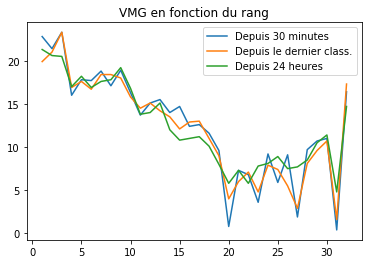

In [191]:
rang_vmg_df = vmg_and_rank(80)

plt.plot(rang_vmg_df["Rang"], rang_vmg_df['VMG (depuis 30 minutes) (kts)'])
plt.plot(rang_vmg_df["Rang"], rang_vmg_df['VMG (depuis le dernier classement) (kts)'])
plt.plot(rang_vmg_df["Rang"], rang_vmg_df['VMG (depuis 24 heures) (kts)'])
plt.title("VMG en fonction du rang")
plt.legend(["Depuis 30 minutes", "Depuis le dernier class.", "Depuis 24 heures"])

Il semble en effet qu'on trouove plus de hautes valeurs de VMG à gauche du graphe, et donc qu'elles correspondent en moyenne à des meilleurs rangs.
    

Pour vérifier cela, calculons la corrélation entre ces différentes grandeurs.

In [24]:
rang_vmg_df.corr()['Rang']

Rang                                        1.000000
VMG (depuis 30 minutes) (kts)              -0.778563
VMG (depuis le dernier classement) (kts)   -0.801522
VMG (depuis 24 heures) (kts)               -0.823956
Name: Rang, dtype: float64

    La méthode .corr() utilisée ci-dessus nous renvoie la correlation entre chaque couple de colonnes du dataframe. Bien évidement, les valeurs diagonales sont égales à 1. On se restreint à la première ligne du Dataframe, qui nous donne la corrélation entre le "Rang" et les autres grandeurs.
    
    Les 3 valeurs sont négatives. C'est normal : Les meilleurs rangs sont ceux qui ont les valeurs les plus faibles, alors que les meilleures VMG ont les valeurs les plus élevées.
    
    On trouve trois coefficients de corrélation de -0.77, -0.80 et -0.82. Ce sont des valeurs tout à fait significatives, car supérieures à 0.5 en valeur absolue.
    
    On remarque que la corrélation la plus forte se trouve entre le "Rang" et la "VMG (depuis 24 heures)". Là aussi, c'est cohérent : Un skippeur ayant une bonne VMG sur les dernières 24 heures à statistiquement plus de chances d'être bien classé qu'un skippeur ayant une bonne VMG sur les 30 dernières minutes : une durée plus courte est moins significative.

    Maintenant, effectuons ces calculs sur un grand nombre de classements, pour vérifier que nos hypothèses sont bien valides.
    
    On va calculer les corrélations moyennes sur l'ensemble des classements (pour "30 minutes", "dernier classement", et "24 heures").

In [25]:
n = number_of_available_rankings()
n

137

In [190]:
corr_30min = 0
corr_dernier_classement = 0
corr_24_heures = 0

count = 0
for i in range(3,n-5): 
    rang_vmg_df = vmg_and_rank(i)
    corr_30min += rang_vmg_df.corr()['Rang'].values[1]
    corr_dernier_classement += rang_vmg_df.corr()['Rang'].values[2]
    corr_24_heures += rang_vmg_df.corr()['Rang'].values[3]
    count += 1

corr_30min /= count
corr_dernier_classement /= count
corr_24_heures /= count

In [27]:
print("corr_30min : " +str(corr_30min), 
      "corr_dernier_classement : " +str(corr_dernier_classement),
      "corr_24_heures : " +str(corr_24_heures))

corr_30min : -0.4114231751329577 corr_dernier_classement : -0.45639643762043747 corr_24_heures : -0.5389523158030527


    D'après les corrélations moyennes observées, on peut conclure que nos hypothèses sont valables :
    
- Il existe une corrélation significative entre le rang d'un skipper et sa VMG. 
    (corrélation négative, un bon rang étant un rang faible).
- Cette corrélation est d'autant plus forte que sa VMG moyenne est mesurée sur une longue période 
    (24 heures > dernier classement > 30 minutes)

#### Régression Linéaire

    On va effectuer une régression linéaire entre la VMG, et le rang des skippeurs. 
    La fonction de coût associée sera celle des Moindres Carrés Ordinaires.
    
    On va chercher à prédire le Rang en fonction des VMG (sur 30 minutes, depuis le dernier classement, et sur 24 heures).
    
    Tout d'abord, crééons le Dataframe contenant les données pertinentes.

In [117]:
def ordered_vmg_rank_df(n):
    '''
    Cette fonction renvoie un Dataframe contenant l'ensemble des rangs
    et VMG des différents skippers, à un moment donné (associé au numéro du classement concerné, n.
    '''
    df = vmg_and_rank(n).reset_index().drop(columns="Nom du Skipper")[['VMG (depuis 30 minutes) (kts)',
                                                              'VMG (depuis le dernier classement) (kts)',
                                                              'VMG (depuis 24 heures) (kts)', "Rang"]]
    return(df)

On va donc créér un Dataframe contenant ces informations pour tous les classements, grâce à la fonction .append().
Ce Dataframe contiendra environ N lignes, avec N = (nombre de participants * nombre de classements déjà publiés).

In [147]:
n = number_of_available_rankings()
df = ordered_vmg_rank_df(2)

for i in range(3, n):
    df = df.append(ordered_vmg_rank_df(i))

df = df.reset_index().drop(columns="index")
df

,VMG (depuis 30 minutes) (kts),VMG (depuis le dernier classement) (kts),VMG (depuis 24 heures) (kts),Rang
0,17.5,0.0,0.3,1
1,10.9,0.0,0.2,2
2,15.5,0.0,0.2,3
3,13.1,0.0,0.2,4
4,10.9,0.0,0.7,5
...,...,...,...,...
4311,10.9,11.3,8.7,28
4312,8.4,8.9,9.0,29
4313,13.8,13.9,13.1,30
4314,7.7,10.1,8.3,31


    On va pouvoir effectuer une régression linéaire avec ces données. Les covariables sont les 3 VMG, et le rang est le label, c'est à dire la variable à prédire.

In [71]:
regression_data = df

from sklearn.model_selection import train_test_split
X = regression_data.drop("Rang", axis = 1)
y = regression_data.drop(["VMG (depuis 30 minutes) (kts)",
                      "VMG (depuis le dernier classement) (kts)","VMG (depuis 24 heures) (kts)"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

Maintenant que nous avons nos données d'entraînement et de test, nous pouvons effectuer la régression linéaire.

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

On va maintenant évaluer la qualité de la prédiction du modèle.

In [81]:
lr.score(X_train, y_train), lr.score(X_test, y_test), lr.coef_

(0.22371102684142596,
 0.18268501841278306,
 array([[-0.19442083, -0.06698252, -0.76027157]]))

On remarque que les coefficients R2 obtenus sont plutôt faibles : autour de 0.2.

D'après les coefficients associés aux 3 covariables, on remarque que la dernière (la VMG sur les dernières 24 heures) a nettement plus de poids que les deux autres.
C'est cohérent : une vitesse moyenne sur 24 heures est plus riche en information qu'une vitesse moyenne sur 30 minutes.

Avec le recul, on peut trouver le défaut de notre modèle actuel : il n'utilise que des informations de VMG récentes (24 heures ou moins), alors que le rang d'un skipper dépend de son comportement depuis le début de la course.

Nous allons donc faire une nouvelle régression linéaire, avec des données différentes : un Dataframe (anonymisé) comprenant une ligne par skipper, et 1 colonne par jour depuis le début de la course, contenant la VMG moyenne du skipper sur les dernières 24 heures. Ainsi, nous auront plus de "continuité" et de cohérence dans nos données.

Le prix a payer est la réduction de notre nombre de lignes : nous n'en aurons qu'une trentaine. Il est possible que cela impacte négativement les résultats de notre régression.

In [99]:
def VMG_24_with_name(n):
    '''
    Cette fonction prend en argument un entier n, et renvoie un Dataframe à 2 colonnes : le nom du Skipper, et
    sa VMG sur les dernières 24 heures. Le classement choisi est celui associé à l'entier n passé en argument.
    '''
    df = vmg_and_rank(n)[["VMG (depuis 24 heures) (kts)"]].reset_index()
    return(df)

Grâce à la fonction ci-dessus, on va pouvoir créer un Dataframe large, avec toutes les VMG (24h) depuis 
le début de la course pour chaque participant.
On commencera à choisir les classements à partir du 9e : avant cela, la course avait commencé depuis moins de 24 heures.
On ne selectionnera aussi qu'un classement sur 6, car 6 classements sont publiés toutes les 24 heures.
Ainsi, on évite d'avoir des informations redondantes, et trop de colonnes (ce qui augmenterait le risque d'"overfit").

In [120]:
n = number_of_available_rankings()

regression_data_2 = VMG_24_with_name(9)

count = 9
for i in range(10, n-2):
    count += 1
    if ((i-9)%6 == 0):
        regression_data_2 = regression_data_2.merge(VMG_24_with_name(i), on = "Nom du Skipper")

regression_data_2 = regression_data_2.merge(vmg_and_rank(count)["Rang"], on = "Nom du Skipper")

In [123]:
X = regression_data_2.drop(columns = ["Nom du Skipper", "Rang"])
y = regression_data_2["Rang"]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

lr_2 = LinearRegression()
lr_2.fit(X_train, y_train)

LinearRegression()

In [145]:
lr_2.score(X_train, y_train), lr_2.score(X_test, y_test)

(0.9964288671852048, -0.783046779808978)

Cette fois, notre algorithme est très performant sur le sample d'entrainement, mais il est mauvais sur le sample de test. Notre algorithme a probablement "overfitté" : nous lui avons fourni trop de covariables (21) par rapport au nombre d'échantillons disponibles (28).

Le score obtenu sur l'échantillon de test est négatif, cela signifie que notre modèle performe moins bien qu'un modèle sans covariables !

Au moins, notre premier modèle nous donnait un R2 supérieur à zéro, aux alentours de 0.2.

Pour résoudre ce problème d'overfit, nous pouvons réduire le nombre de colonnes. 
Pour cela, nous allons limiter nos données aux VMG (depuis 24 heures) prises 1 jour sur 3, ce qui nous permettra de passer de 21 à 7 covariables.

Nous avons juste à remplacer le (modulo 6) par un (modulo 18) dans le code utilisé ci-dessus.

In [148]:
regression_data_3 = VMG_24_with_name(9)

count = 9
for i in range(10, n-2):
    count += 1
    if ((i-9)%18 == 0):
        regression_data_3 = regression_data_3.merge(VMG_24_with_name(i), on = "Nom du Skipper")

regression_data_3 = regression_data_3.merge(vmg_and_rank(count)["Rang"], on = "Nom du Skipper")

In [149]:
X = regression_data_3.drop(columns = ["Nom du Skipper", "Rang"])
y = regression_data_3["Rang"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

lr_3 = LinearRegression()
lr_3.fit(X_train, y_train)

lr_3.score(X_train, y_train), lr_3.score(X_test, y_test)

(0.9309790393790635, 0.4188469049484197)

Les résultats observés sont conformes à nos attentes : le score de prédiction sur l'échantillon de test est meilleur (0,41, ce qui commence à être un score intéressant), et le score sur l'échantillon d'entraînement est moins élevé, ce qui est aussi bien : une valeur très proche de 1, comme précédemment, indiquait vraiement un "overfit" de notre algorithme.

On peut pousser ce travail encore plus loin : cherchons pour combien de covariables l'on obtient le meilleur score sur l'échantillon de test ! 
On va définir une fonction prenant un entier en argument (le nombre par leqeul on divise le nombre de covariables) et renvoyant le score de l'algorithme sur l'échantillon de test.

In [182]:
def score_on_test(n):
    """
    n est le nombre de jours qui séparent deux prises de données.
    """
    regression_data = VMG_24_with_name(9)
    for i in range(10, n-2):
        if ((i-9)%(6*n) == 0):
            regression_data = regression_data.merge(VMG_24_with_name(i), on = "Nom du Skipper")
    regression_data = regression_data.merge(vmg_and_rank(count)["Rang"], on = "Nom du Skipper")
    X = regression_data.drop(columns = ["Nom du Skipper", "Rang"])
    y = regression_data["Rang"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    score_test = lr.score(X_test, y_test)
    return(score_test)

On peut visualiser graphiquement la performance de notre algorithme en fonction du nombre de covariables.

Text(0.5, 1.0, "Scores sur l'échantillon de test en fonction du nombre de covariables")

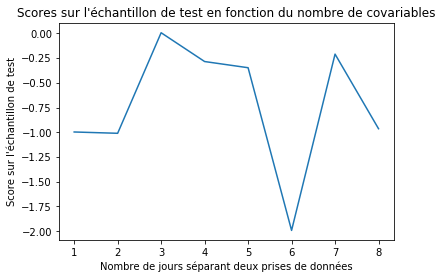

In [188]:
n = 9
X = [i for i in range (1,n)]
y = [score_on_test(x) for x in X]
plt.plot(X, y)
plt.xlabel("Nombre de jours séparant deux prises de données")
plt.ylabel("Score sur l'échantillon de test")
plt.title("Scores sur l'échantillon de test en fonction du nombre de covariables")

Selon nos hypothèses, nous devrions observer :

    - Pour un n faible, une performance faible : c'est du sur-apprentissage (trop de covariables).
    - Pour un n moyen, une merformance élevée : c'est un bon compromis sur le nombre de covariables.
    - Pour un n élevé une performance faible : c'est du sous-apprentissage (trop peu de covariables).

Toutefois, les résultats obtenus ne nous permettent ni de confirmer ni d'infirmer cela : En relançant le calcul plusieurs fois, on obtient souvent des résultats différents. C'est dû à la taille trop faible des échantillons.
On peut conclure qu'il nous faudrait plus d'échantillons pour pouvoir déterminer précisement le nombre idéal de covariables pour effectuer cette régression linéaire.

    Ainsi, nous pouvons rester sur le compromis de 1 donnée tous les 3 jours (soit tous les 18 classements) pour prédire le rang en fonction de la VMG (voir lr_2 plus haut).

Ainsi, nous avons pu tester différentes manières de prédire le rang des skippeurs en fonction de leurs VMGs au fil de la course.

### Impact de la présence d'un foil sur le classement et la vitesse des voiliers.

Prenons un Dataframe specs_with_ranking, et voyons si l'existence d'un foil joue sur la vitesse du voilier.

Nous définissons une fonction foil_impact(n), qui, à partir d'un Dataframe specs_with_ranking(n), nous donne l'écart de vitesse  entre les bateaux avec foil et ceux sans foil (pour les trois vitesses mesurées), ainsi que leurs rangs moyens.

In [224]:
def foil_impact(n):
    df = specs_with_ranking(n)
    #On transforme le contenu de cette colonne, en associant les valeurs "2 asymétriques" aux 
    #valeurs "2", et en associant "foiler" à "foils".
    mapping = {"foils":"foils", "foiler": "foils" , "2 asymétriques" : "2", "2":"2"}
    df['Nombre de dérives'] = df['Nombre de dérives'].apply(lambda x: mapping[x])

    #Ci dessous, on définit les vitesses moyennes des deux catégories de bateaux
    mean_speed_withtoutfoil_30mins = df.loc[df['Nombre de dérives']=="2", ["Vitesse (depuis 30 minutes) (kts)"]].mean()
    mean_speed_withtfoil_30mins = df.loc[df['Nombre de dérives']=="foils", ["Vitesse (depuis 30 minutes) (kts)"]].mean()
    mean_speed_withtoutfoil_last_ranking = df.loc[df['Nombre de dérives']=="2", ["Vitesse (depuis le dernier classement) (kts)"]].mean()
    mean_speed_withtfoil_last_ranking =df.loc[df['Nombre de dérives']=="foils", ["Vitesse (depuis le dernier classement) (kts)"]].mean()
    mean_speed_withtoutfoil_24h = df.loc[df['Nombre de dérives']=="2", ["Vitesse (depuis 24 heures) (kts)"]].mean()
    mean_speed_withtfoil_24h = df.loc[df['Nombre de dérives']=="foils", ["Vitesse (depuis 24 heures) (kts)"]].mean()

    #On calcule le % d'écart entre les vitesses des deux types de bateaux
    speed_bonus_30mins = ((mean_speed_withtfoil_30mins - mean_speed_withtoutfoil_30mins)/ mean_speed_withtoutfoil_30mins)*100
    speed_bonus_lastranking = ((mean_speed_withtfoil_last_ranking - mean_speed_withtoutfoil_last_ranking)/ mean_speed_withtoutfoil_last_ranking)*100
    speed_bonus_24h = ((mean_speed_withtfoil_24h - mean_speed_withtoutfoil_24h)/ mean_speed_withtoutfoil_24h)*100

    #Etudions maintenant l'impact sur le classement.
    mean_rank_without = df.loc[df['Nombre de dérives']=="2", ["Rang"]].mean()
    mean_rank_with = df.loc[df['Nombre de dérives']=="foils", ["Rang"]].mean()
    return(speed_bonus_30mins, speed_bonus_lastranking, speed_bonus_24h, mean_rank_with, mean_rank_without)

In [227]:
foil_impact(20)

(Vitesse (depuis 30 minutes) (kts)    30.955086
 dtype: float64,
 Vitesse (depuis le dernier classement) (kts)    37.632607
 dtype: float64,
 Vitesse (depuis 24 heures) (kts)    8.280996
 dtype: float64,
 Rang    17.166667
 dtype: float64,
 Rang    17.714286
 dtype: float64)

D'après le classement numéro 20, les bateaux avec foils ont une vitesse supérieur de 8% à ceux sans foils sur les dernières 24 heures, et ont un rang moyen légèrement plus faible ( 17,1 par rapport à 17,7 e).

Nous allons faire tourner notre fonction sur de nombreux classements, et moyenner les résultats obtenus, afin que ces derniers soient fiables.

In [232]:
speed_bonus_30mins = 0
speed_bonus_lastranking = 0
speed_bonus_24h = 0
mean_rank_with = 0
mean_rank_without = 0

count = 0
for i in range(10, 110):
    count += 1
    speed_bonus_30mins += foil_impact(i)[0]
    speed_bonus_lastranking += foil_impact(i)[1]
    speed_bonus_24h += foil_impact(i)[2]
    mean_rank_with += foil_impact(i)[3]
    mean_rank_without += foil_impact(i)[4]
    
speed_bonus_30mins /= count
speed_bonus_lastranking /= count
speed_bonus_24h /= count
mean_rank_with /= count
mean_rank_without /= count

print(speed_bonus_30mins, speed_bonus_lastranking, speed_bonus_24h, mean_rank_with, mean_rank_without)

Vitesse (depuis 30 minutes) (kts)    18.408378
dtype: float64 Vitesse (depuis le dernier classement) (kts)    17.246821
dtype: float64 Vitesse (depuis 24 heures) (kts)    15.871091
dtype: float64 Rang    15.108333
dtype: float64 Rang    19.068571
dtype: float64


On observe que les bateaux avec foil ont en moyenne une vitesse plus élevée (un bonus d'environ 16%), et un meilleur rang moyen (15e contre 19e) que les bateaux sans foil, ce qui est cohérent.

### Visualisation de la distance parcourue par voilier.

In [253]:
#La ligne de code ci-dessous nous fournit la liste des noms de skippers.
names = specs_with_ranking(30).index
names

Index(['Alex Thomson', 'Jean Le Cam', 'Thomas Ruyant', 'Charlie Dalin',
       'Benjamin Dutreux', 'Kevin Escoffier', 'Maxime Sorel',
       'Samantha Davies', 'Damien Seguin', 'Romain Attanasio',
       'Yannick Bestaven', 'Boris Herrmann', 'Louis Burton', 'Clarisse Cremer',
       'Giancarlo Pedote', 'Sebastien Simon', 'Alan Roura',
       'Stephane Le Diraison', 'Kojiro Shiraishi', 'Isabelle Joschke',
       'Arnaud Boissieres', 'Manuel Cousin', 'Pip Hare', 'Didac Costa',
       'Ari Huusela', 'Miranda Merron', 'Armel Tripon', 'Alexia Barrier',
       'Clement Giraud', 'Sebastien Destremau', 'Fabrice Amedeo',
       'Jeremie Beyou'],
      dtype='object', name='Nom du Skipper')

Le code ci-dessous nous donne la distance parcourue en 24 heures par un skipper donné, selon un classement donné.

In [250]:
print("Distance en 24 heures (milles marins):" + str(specs_with_ranking(20)["Distance (depuis 24 heures) (mille marin)"]['Charlie Dalin']))

Distance en 24 heures (milles marins):300.2


    Pour calculer la distance parcourue par chaque voilier, on va utiliser la colonne "Distance (depuis 24 heures) (mille marin)" du dataframe specs_with_ranking(n). Nous allons donc devoir récupérer 1 classement précis par jour depuis le début de la course, afin de retracer l'activité des bateaux depuis le début de la course.
    
    Ci-dessous, nous récupérons l'information de la distance parcourue par les différents bateaux lors des premières 24 heures de course.
    
    Des classements sont établis tous les jours à 4:00, 8:00, 11:00, 14:00, 17:00, 21:00. Le 8 novembre (départ de la course), des classements ont été établis à 12:02 (départ de la course), 14:00, 15:00, 17:00, 21:00.
    Nous allons utiliser l'ensemble des classements établis à 21:00. 
    Cela correspond aux classements numéros 5, 11, 17, 23, etc...

In [ ]:
def distance_parcourue(skipper):
    limit = number_of_available_rankings()
    indices = []
    for i in range(1, limit+1):
        if i%6 == 5:
            indices.append(i)
    total_distance = 0
    for indice in indices :
        dist = specs_with_ranking(indice)["Distance (depuis 24 heures) (mille marin)"][str(skipper)]
        total_distance += dist
    return(total_distance)


print( "Alan Roura : Distance totale parcourue (milles marins): " +str(distance_parcourue("Alan Roura")))

In [264]:
l=[[],[]]
count = 0
dist = 0

for name in names:
    dist = round(distance_parcourue(name),2)
    l[0].append(str(name))
    l[1].append(str(dist))
        
df = pd.DataFrame(l)
df=df.T
df.columns=("Nom du Skipper", "Distance totale parcourue")
df = df.set_index("Nom du Skipper")
df

,Distance totale parcourue
Nom du Skipper,
Alex Thomson,7067.5
Jean Le Cam,6976.2
Thomas Ruyant,7402.0
Charlie Dalin,7768.7
Benjamin Dutreux,7114.6
Kevin Escoffier,7488.6
Maxime Sorel,6931.1
Samantha Davies,7292.1
Damien Seguin,7187.8


Le Dataframe ci-dessous nous donne la distance parcourue par chaque skipper depuis le début de la course.

### Cartes avec les routes d'un ou plusieurs voiliers selon diverses projections (cylindrique équidistante, sinusoïdale, ...).

In [265]:
def angle_convertor(deg,min,sec):
    '''
    Cette fonction nous permet de transformer les angles exprimés en degrés, minutes et secondes en angles exprimés en degrés.
    '''
    return(deg+min/60+sec/3600)

angle_convertor(40,20,48)

40.34666666666667

In [ ]:
def past_coordinates(skipper):
    '''
    Cette fonction nous renvoie un Dataframe avec l'ensemble des coordonnées passées d'un skipper.
    '''
    skipper = str(skipper)
    limit = number_of_available_rankings()
    coordinates = [[],[]]
    mapping = {'N' : "+", "S":"-", "E":"-","W":"+"}
    for i in range(2, limit - 1):
        val_0 = ranking_data_cleaning(ranking_number_n(i)).loc[skipper, ["Latitude"]].values[0]
        val_0 = mapping[val_0[-1]] + val_0[:-1]
        val_0 = angle_convertor(int(val_0[1:3]), int(val_0[4:6]), int(val_0[7:9]))
        coordinates[0].append(val_0)
        val_1 = ranking_data_cleaning(ranking_number_n(i)).loc[skipper, ["Longitude"]].values[0]
        val_1 = mapping[val_1[-1]] + val_1[:-1]
        val_1 = angle_convertor(int(val_1[1:3]), int(val_1[4:6]), int(val_1[7:9]))
        coordinates[1].append(val_1)
    coordinates = pd.DataFrame(coordinates)
    name = str("Coordinates - " + str(skipper))
    coordinates[name] = ["Latitude", "Longitude"]
    coordinates = coordinates.set_index(name)
    #coordinates.loc['Latitude'] = coordinates.loc['Latitude'].apply(lambda x:(mapping[x[-1]] + x[:-1]))
    #coordinates.loc['Longitude'] = coordinates.loc['Longitude'].apply(lambda x:(mapping[x[-1]] + x[:-1]))
    return(coordinates)

past_coordinates('Jean Le Cam')

In [267]:
names

Index(['Alex Thomson', 'Jean Le Cam', 'Thomas Ruyant', 'Charlie Dalin',
       'Benjamin Dutreux', 'Kevin Escoffier', 'Maxime Sorel',
       'Samantha Davies', 'Damien Seguin', 'Romain Attanasio',
       'Yannick Bestaven', 'Boris Herrmann', 'Louis Burton', 'Clarisse Cremer',
       'Giancarlo Pedote', 'Sebastien Simon', 'Alan Roura',
       'Stephane Le Diraison', 'Kojiro Shiraishi', 'Isabelle Joschke',
       'Arnaud Boissieres', 'Manuel Cousin', 'Pip Hare', 'Didac Costa',
       'Ari Huusela', 'Miranda Merron', 'Armel Tripon', 'Alexia Barrier',
       'Clement Giraud', 'Sebastien Destremau', 'Fabrice Amedeo',
       'Jeremie Beyou'],
      dtype='object', name='Nom du Skipper')

Nous allons afficher la traectoire de Didac Costa sur une world map.
Commencons par afficher un graphique de ses différentes coordonnées.

In [303]:
Costa = past_coordinates("Didac Costa")
Costa

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
Coordinates - Didac Costa,,,,,,,,,,,,,,,,,,,,,
Latitude,46.433056,46.355556,46.298056,46.243611,46.137778,46.161944,46.212778,45.802222,45.326667,44.638889,...,27.782222,28.336667,28.913056,29.508056,30.343333,31.576944,32.059722,32.419444,32.896111,33.186944
Longitude,1.823611,2.324444,2.893889,4.166944,5.772500,6.534167,7.125278,7.257500,7.487778,7.915833,...,33.484444,33.467500,33.436111,33.232778,32.868611,31.939722,31.244444,30.734722,30.205000,29.569444


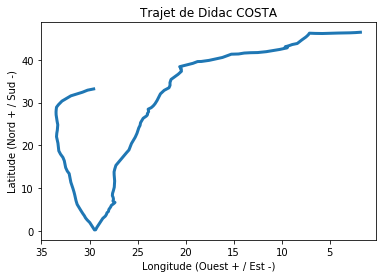

In [314]:
plt.plot(Costa.loc["Longitude"], Costa.loc["Latitude"], lw = 3)
plt.title("Trajet de Didac COSTA")
plt.ylabel("Latitude (Nord + / Sud -)")
plt.xlabel("Longitude (Ouest + / Est -)")
plt.gca().invert_xaxis()

In [316]:
from ipyleaflet import Map, Polyline

line = Polyline(
    locations= Costa.T.values.tolist()
    ,
    color = "blue",
    fill = False
)

m = Map(center = (10, 0), zoom = 2)
m.add_layer(line)
m

Map(center=[10, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

    Les trajectoires des skippers étant très similaires vu de loin, il n'est pas forcément nécessaire de toutes les afficher ensemble.

Conclusion :
Ce projet final m'a permis de progresser dans 4 aspects importants du travail de "Data Scientist" : l'acquisition des données, leur nettoyage, leur exploitation, et l'interprétation des résultats.